#### Name : Adarsh Kumar 

Stack Overflow: Tag Prediction

Data Link :https://www.kaggle.com/competitions/facebook-recruiting-iii-keyword-extraction/data

In [1]:
#importing modules
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [2]:
TextFileReader = pd.read_csv('train.csv', chunksize=180000)  # the number of rows per chunk

dfList = []
for df in TextFileReader:
    dfList.append(df)

df = pd.concat(dfList,sort=False)

In [3]:
df.columns

Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')

In [4]:
df.shape

(6034195, 4)

In [5]:
df

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
...,...,...,...,...
6034190,6034191,Parse JSON or XML in Status,<p>I wonder how Facebook parse the status or c...,xml facebook json status
6034191,6034192,Javascript resize on every image load,<p>I've got this code:</p>\n\n<pre><code>while...,php javascript
6034192,6034193,Update database with big CSV,<p>I need every day update ~ 10.000 items in m...,php sql query csv phpmyadmin
6034193,6034194,Difficulty adding a new view to a Roo-generate...,<p>I'm trying to add my custom view and contro...,java spring spring-mvc view spring-roo


In [6]:
#Finding Duplicates 
duplicate=df[df.duplicated(['Title','Body','Tags'])]
duplicate

,Id,Title,Body,Tags
3550,3551,Compatibility issues with <a> and calling a fu...,<p>I am new to javascript. I wrote the followi...,function anchor
5246,5247,Using JTA with Spring +hibernate JPA+Glassfish...,<p>I have been struggling with this issues and...,spring hibernate jpa glassfish jta
9968,9969,Groovy Properties Assertion Fails,<p>Here is the content of my groovy file:</p>\...,properties groovy assert
10597,10598,Importance of isomorphic functions,<p><strong>Short Question:</strong> What is th...,functional-programming isomorphism
10939,10940,VB6 Form.Show is not working,<p>I have a project with graphs that can be pr...,forms vb6
...,...,...,...,...
6034187,6034188,Flex Mobile : How to skin view?,<p>I would like to know if it's possible to sk...,skinning flex-mobile flex4.6
6034189,6034190,Drop Down List (in Update Panel) causing FULL ...,<p>I have a problem with my AJAX and ASP.NET 3...,asp.net ajax ajaxcontroltoolkit
6034190,6034191,Parse JSON or XML in Status,<p>I wonder how Facebook parse the status or c...,xml facebook json status
6034191,6034192,Javascript resize on every image load,<p>I've got this code:</p>\n\n<pre><code>while...,php javascript


In [7]:
#removing Duplicates
df=df.drop_duplicates(['Title','Body','Tags'])
df

,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents
...,...,...,...,...
6034185,6034186,Running NSTimer at 0.03seconds repeating - inc...,<pre><code> recordingTimer = [NSTimer s...,objective-c nstimer
6034186,6034187,Small Business Server 2008 Not Responding to E...,<p>I have just deployed SBS 2008 Standard and ...,windows-server-2008 dns windows-sbs-2008 small...
6034188,6034189,rdiff-backup changes permissions of source dir...,<p>I recently found rdiff-backup which seems t...,backup rsync rdiff-backup
6034192,6034193,Update database with big CSV,<p>I need every day update ~ 10.000 items in m...,php sql query csv phpmyadmin


In [8]:
df["tag_count"]=df["Tags"].apply(lambda row : len(str(row).split(" ")))
df

,Id,Title,Body,Tags,tag_count
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,5
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,1
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,3
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,3
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,3
...,...,...,...,...,...
6034185,6034186,Running NSTimer at 0.03seconds repeating - inc...,<pre><code> recordingTimer = [NSTimer s...,objective-c nstimer,2
6034186,6034187,Small Business Server 2008 Not Responding to E...,<p>I have just deployed SBS 2008 Standard and ...,windows-server-2008 dns windows-sbs-2008 small...,4
6034188,6034189,rdiff-backup changes permissions of source dir...,<p>I recently found rdiff-backup which seems t...,backup rsync rdiff-backup,3
6034192,6034193,Update database with big CSV,<p>I need every day update ~ 10.000 items in m...,php sql query csv phpmyadmin,5


In [9]:
df.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568297
5     505158
Name: tag_count, dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(4206307, 5)

#### EDA (Exploratory Data Analysis)

Analysis of Tags

In [12]:
vectorizer=CountVectorizer(tokenizer=lambda x:x.split())
tag_dtm=vectorizer.fit_transform(df["Tags"])

In [13]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206307
Number of unique tags : 42048


In [14]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


In [15]:
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [16]:
#Saving this result dictionary to dataframe.
tag_df = pd.DataFrame(result.items(), columns=["Tags", "Counts"])
tag_df

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138
...,...,...
42043,zxspectrum,3
42044,zypper,17
42045,zywall,8
42046,zyxel,32


In [17]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

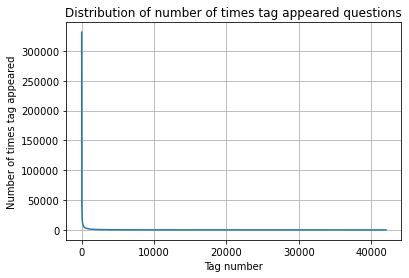

In [18]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

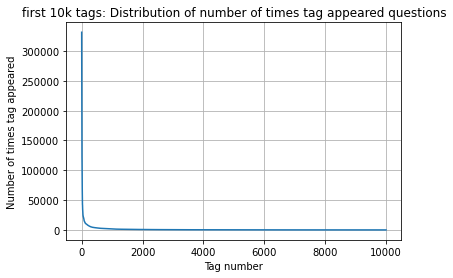

400 [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2986   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    365
  

In [19]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

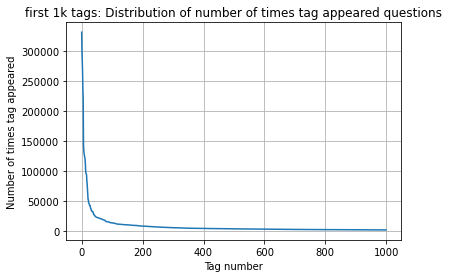

200 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3482
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2986   2983   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   2444
  

In [20]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

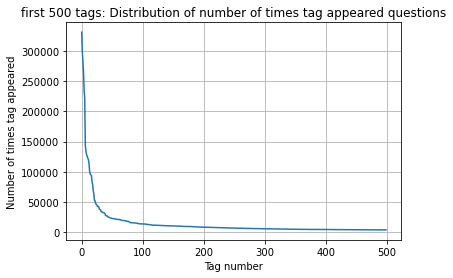

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3482]


In [21]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

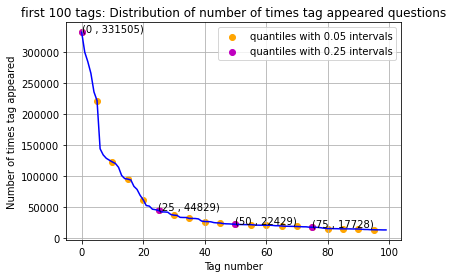

20 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703]


In [22]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [23]:
tag_df

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138
...,...,...
42043,zxspectrum,3
42044,zypper,17
42045,zywall,8
42046,zyxel,32


In [24]:
tag_gt_10k=tag_df[tag_df.Counts>10000].Tags
print('{} Tags are used more than 10k times'.format(len(tag_gt_10k)))

tag_gt_100k=tag_df[tag_df.Counts>100000].Tags
print('{} Tags are used more than 100k times'.format(len(tag_gt_100k)))

153 Tags are used more than 10k times
14 Tags are used more than 100k times


#### Observations 

1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.

In [25]:
tag_df_sorted

,Tags,Counts
4337,c#,331505
18069,java,299414
27249,php,284103
18157,javascript,265423
1234,android,235436
...,...,...
29936,rbindlist,1
29934,rbga,1
29930,rbar,1
2925,azureus,1


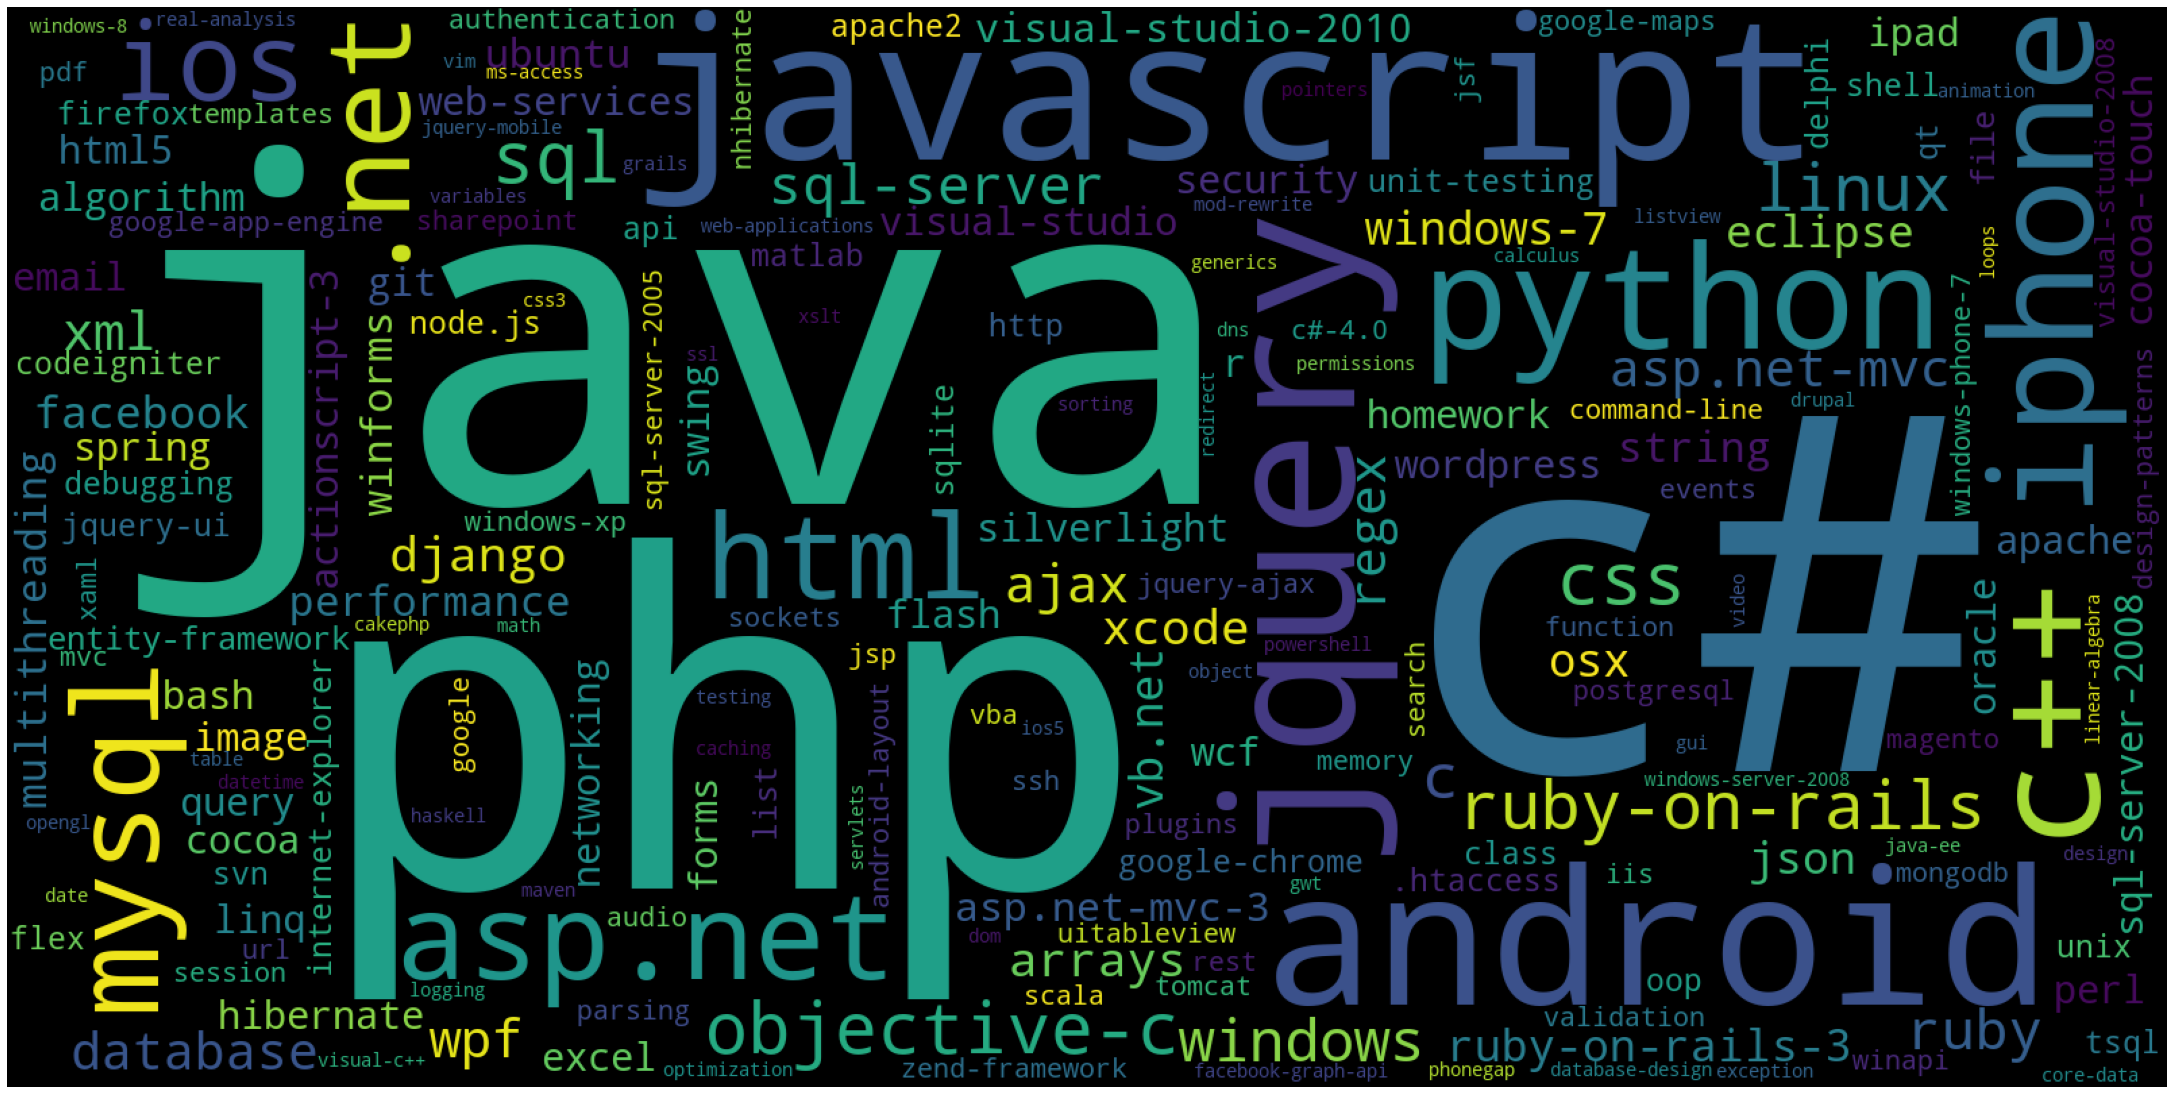

Time taken to run this cell : 0:00:03.188819


In [26]:
#Finding Most Frequent Tag using word cloud

start = datetime.now()

# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())

#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()
print("Time taken to run this cell :", datetime.now() - start)

### Observations
 A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

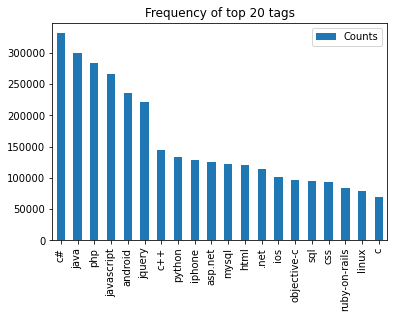

In [27]:
#the top 20 tags
i = np.arange(20)
tag_df_sorted.head(20).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'][:20])
plt.show()

### Observations

1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

### Data Preprocessing

1. Sample 100000 data points
2. Separate out code-snippets from Body
3. Remove Spcial characters from Question title and description (not in code)
4. Remove stop words (Except 'C')
5. Remove HTML Tags
6. Convert all the characters into small letters
7. Use SnowballStemmer to stem the words

In [28]:
df.shape

(4206307, 5)

In [29]:
random_df = df.sample(100000)

In [30]:
random_df.head()

,Id,Title,Body,Tags,tag_count
794530,794531,Build android project using Ant,<p>I need to make an auto build system. I have...,android ant build,3
1283988,1283989,Automatically generate nested table of content...,<p>Which one of you crafty programmers can sho...,php dynamically-generated,2
2525657,2525658,100% parent div with floated left images inside,<p>I have a parent div that has a bunch of chi...,css,1
1475118,1475119,htaccess with python and php,<p>I have python and php scripts on my web.</p...,php python .htaccess,3
3173044,3173045,strange routing table after PXE boot WinPE,"<p>I have a pxe boot WinPE using iPXE, iPXE co...",routing pxeboot winpe,3


In [31]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr,' ',str(data))
    return cleantext

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

In [32]:
import re
start = datetime.now()
preprocessed_data_list=[]
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
prepared_df = pd.DataFrame(columns=['question','code','tags','words_pre','words_post','is_code'])
for row in random_df.iterrows():

    is_code = 0

    #As title seems very important feature Hence increasing title weight by adding it 3 times
    title, question, tags = row[1][1], row[1][2], row[1][3]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    processed_di = {
        "question": question,
        "code": code,
        "tags": tags,
        "words_pre": x,
        "words_post": len(question),
        "is_code" : is_code
    }
    
    prepared_df.loc[len(prepared_df.index)] = [question,code,tags,x,len(question),is_code]
    questions_proccesed += 1
    if (questions_proccesed%10000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 10000
number of questions completed= 20000
number of questions completed= 30000
number of questions completed= 40000
number of questions completed= 50000
number of questions completed= 60000
number of questions completed= 70000
number of questions completed= 80000
number of questions completed= 90000
number of questions completed= 100000
Avg. length of questions(Title+Body) before processing: 1170
Avg. length of questions(Title+Body) after processing: 325
Percent of questions containing code: 57
Time taken to run this cell : 0:39:27.078857


In [33]:
prepared_df.head()

,question,code,tags,words_pre,words_post,is_code
0,build android project use ant need make auto b...,[],android ant build,609,360,0
1,automat generat nest tabl content base head ta...,['&lt;h1&gt; Animals &lt;/h1&gt;\n\nSome conte...,php dynamically-generated,1071,310,1
2,parent div float left imag insid parent div bu...,[],css,634,343,0
3,htaccess python php python php script web prob...,['Options Indexes Includes ExecCGI\nOptions +E...,php python .htaccess,665,276,1
4,strang rout tabl pxe boot winp pxe boot winp u...,['sanhook iscsi:10.86.13.52::::iqn.2003-01.org...,routing pxeboot winpe,2128,237,1


In [34]:
prepared_df.shape

(100000, 6)

In [35]:
preprocessed_data = prepared_df[["question","tags"]]

In [36]:
preprocessed_data 

,question,tags
0,build android project use ant need make auto b...,android ant build
1,automat generat nest tabl content base head ta...,php dynamically-generated
2,parent div float left imag insid parent div bu...,css
3,htaccess python php python php script web prob...,php python .htaccess
4,strang rout tabl pxe boot winp pxe boot winp u...,routing pxeboot winpe
...,...,...
99995,iphon app larg made iphon app relat larg mb la...,ios application product large
99996,easi way search tag profil page easi way searc...,tagging social-tag
99997,android widget background transpar want design...,android background widget transparent
99998,tfs build buildnumberoverridetarget dependson ...,tfs2008 tfsbuild


#### Machine Learning Model 

In [37]:
#converting tags for multilabel problem
vectorizer = CountVectorizer(tokenizer= lambda text : text.split(), binary=True)
multilabel_y = vectorizer.fit_transform(preprocessed_data["tags"])

In [38]:
multilabel_y.shape

(100000, 18587)

In [39]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [40]:
#We will sample the number of tags instead considering all of them (due to limitation of computing power) 
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

In [41]:
questions_explained

[90.184,
 91.262,
 92.164,
 92.968,
 93.615,
 94.127,
 94.527,
 94.955,
 95.327,
 95.655,
 95.955,
 96.199,
 96.437,
 96.683,
 96.859,
 96.984,
 97.14,
 97.285,
 97.434,
 97.546,
 97.65,
 97.756,
 97.816,
 97.903,
 97.982,
 98.066,
 98.143,
 98.189,
 98.263,
 98.329,
 98.389,
 98.448,
 98.495,
 98.541,
 98.59,
 98.63,
 98.66,
 98.7,
 98.735,
 98.775,
 98.802,
 98.839,
 98.871,
 98.904,
 98.935,
 98.951,
 98.977,
 99.011,
 99.031,
 99.057,
 99.068,
 99.107,
 99.129,
 99.155,
 99.172,
 99.186,
 99.203,
 99.216,
 99.24,
 99.259,
 99.286,
 99.314,
 99.328,
 99.349,
 99.354,
 99.369,
 99.38,
 99.391,
 99.407,
 99.416,
 99.429,
 99.439,
 99.453,
 99.462,
 99.482,
 99.493,
 99.509,
 99.518,
 99.523,
 99.539,
 99.545,
 99.557,
 99.562,
 99.572,
 99.581,
 99.586,
 99.591,
 99.594,
 99.613,
 99.621,
 99.632,
 99.634,
 99.642,
 99.653,
 99.664,
 99.678,
 99.682,
 99.69,
 99.7,
 99.712,
 99.719,
 99.72,
 99.731,
 99.741,
 99.747,
 99.753,
 99.76,
 99.763,
 99.769,
 99.781,
 99.785,
 99.79,
 99.794

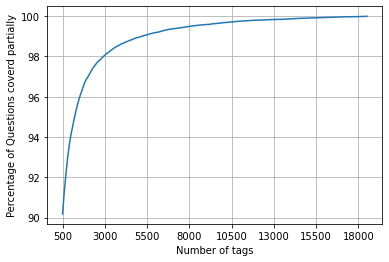

with  5500 tags we are covering  99.068 % of questions
with  500 tags we are covering  90.184 % of questions


In [42]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Percentage of Questions coverd partially")
plt.grid()
plt.show()
# we can choose any number of tags based on our computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [43]:
# we will be taking 5500 tags
multilabel_yx = tags_to_choose(5500)
print("number of questions that are not covered :", questions_explained_fn(5500),"out of ", total_qs)

number of questions that are not covered : 932 out of  100000


In [44]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 18587
number of tags taken : 5500 ( 29.59057405713671 %)


In [45]:
#Split the data into test and train (80:20)

In [46]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [47]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (80000, 5500)
Number of data points in test data : (20000, 5500)


In [48]:
#Featurizing input text data with TfIdf vectorizer

In [49]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:34.643451


In [50]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (80000, 89587) Y : (80000, 5500)
Dimensions of test data X: (20000, 89587) Y: (20000, 5500)


In [51]:
# Applying Logistic Regression with OneVsRest Classifier 
start = datetime.now()
classifier1 = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier1.fit(x_train_multilabel, y_train)
predictions = classifier1.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

accuracy : 0.0779
macro f1 score : 0.07769586628898778
micro f1 scoore : 0.37281303131684307
hamming loss : 0.00041583636363636364
Precision recall report :
               precision    recall  f1-score   support

           0       0.62      0.26      0.37      1559
           1       0.75      0.43      0.55      1402
           2       0.84      0.58      0.69      1361
           3       0.73      0.42      0.53      1262
           4       0.93      0.76      0.84      1146
           5       0.85      0.63      0.72      1040
           6       0.68      0.36      0.47       684
           7       0.86      0.62      0.72       657
           8       0.70      0.43      0.53       585
           9       0.74      0.40      0.52       561
          10       0.85      0.60      0.70       608
          11       0.52      0.15      0.23       560
          12       0.46      0.10      0.16       536
          13       0.78      0.57      0.66       484
          14       0.58      0.

### Trying to Improve our model using Some Hacks
1. using 500 tags instead of 5500
2. using 50,000 points instead of 1,00,000
3. giving more Weightage to title (3*Title)

In [52]:
df.shape

(4206307, 5)

In [53]:
#Randomly Sampling 50000 points
random_df = df.sample(50000)

Data Preprocessing
1. Sample 50000 data points
2. Separate out code-snippets from Body
3. Remove Spcial characters from Question title and description (not in code)
4. Remove stop words (Except 'C')
5. Remove HTML Tags
6. Convert all the characters into small letters
7. Use SnowballStemmer to stem the words
### Give more weightage to title : Add title three times to the question

In [54]:
start = datetime.now()
preprocessed_data_list=[]
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
prepared_df = pd.DataFrame(columns=['question','code','tags','words_pre','words_post','is_code'])
for row in random_df.iterrows():

    is_code = 0

    #As title seems very important feature Hence increasing title weight by adding it 3 times
    title, question, tags = row[1][1], row[1][2], row[1][3]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')
    
    #giving 3 times the weight to title
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    processed_di = {
        "question": question,
        "code": code,
        "tags": tags,
        "words_pre": x,
        "words_post": len(question),
        "is_code" : is_code
    }
    
    prepared_df.loc[len(prepared_df.index)] = [question,code,tags,x,len(question),is_code]
    questions_proccesed += 1
    if (questions_proccesed%5000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 5000
number of questions completed= 10000
number of questions completed= 15000
number of questions completed= 20000
number of questions completed= 25000
number of questions completed= 30000
number of questions completed= 35000
number of questions completed= 40000
number of questions completed= 45000
number of questions completed= 50000
Avg. length of questions(Title+Body) before processing: 1165
Avg. length of questions(Title+Body) after processing: 399
Percent of questions containing code: 57
Time taken to run this cell : 0:12:02.397932


In [55]:
preprocessed_data = prepared_df[["question","tags"]]

In [56]:
#Converting tags for multilabel problems 
vect = CountVectorizer(tokenizer= lambda text : text.split(), binary=True)
multilabel_y = vect.fit_transform(preprocessed_data["tags"])

In [57]:
import pickle
pickle.dump=(vect,open('vectorizer.pkl','wb'))

In [58]:
multilabel_y.shape

(50000, 13949)

In [59]:
#We will sample the number of tags instead considering all of them (due to limitation of computing power) 
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [60]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

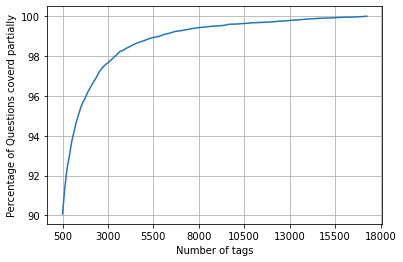

with  5500 tags we are covering  99.238 % of questions
with  500 tags we are covering  90.072 % of questions


In [61]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Percentage of Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 500(it covers 90% of the tags)
print("with ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [62]:
# we will be taking 500 tags
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 4964 out of  50000


In [63]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")
# We consider top 3% tags which covers 90% of the questions

Number of tags in sample : 13949
number of tags taken : 500 ( 3.584486343107033 %)


In [64]:
#Split into 80:20
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [65]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (40000, 500)
Number of data points in test data : (10000, 500)


In [66]:
#Featurizing data
start = datetime.now()
tfidf = TfidfVectorizer(min_df=0.00009, max_features=200000, smooth_idf=True, norm="l2", \
                             tokenizer = lambda x: x.split(), sublinear_tf=False, ngram_range=(1,3))
x_train_multilabel = tfidf.fit_transform(x_train['question'])
x_test_multilabel = tfidf.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:17.868883


In [67]:
pickle.dump=(tfidf,open('tfidf.pkl','wb'))

In [68]:
print("Dimensions of train data X:",x_train_multilabel.shape, "Y :",y_train.shape)
print("Dimensions of test data X:",x_test_multilabel.shape,"Y:",y_test.shape)

Dimensions of train data X: (40000, 108289) Y : (40000, 500)
Dimensions of test data X: (10000, 108289) Y: (10000, 500)


In [75]:
#Finding Best Hyper-parameter
#param={'estimator__alpha': [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1]}

#classifier = OneVsRestClassifier(SGDClassifier(loss='log', penalty='l1'))
#gsv = GridSearchCV(estimator = classifier, param_grid=param, cv=3, verbose=0, scoring='f1_micro',n_jobs=15)
#gsv.fit(x_train_multilabel, y_train)


#best_alpha = gsv.best_estimator_.get_params()['estimator__alpha']
#print('value of alpha after hyperparameter tuning : ',best_alpha)
#print('-------------------------------------------------------------')

In [70]:
# Applying Logistic Regression with OneVsRest Classifier 
start = datetime.now()
classifier2 = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier2.fit(x_train_multilabel, y_train)
predictions = classifier2.predict(x_test_multilabel)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

accuracy : 0.2371
macro f1 score : 0.3505517681526346
micro f1 scoore : 0.4800174710635511
hamming loss : 0.0028572
Precision recall report :
               precision    recall  f1-score   support

           0       0.54      0.26      0.35       789
           1       0.81      0.46      0.59       754
           2       0.85      0.54      0.66       725
           3       0.75      0.44      0.55       604
           4       0.95      0.76      0.84       559
           5       0.86      0.66      0.75       492
           6       0.68      0.32      0.44       373
           7       0.91      0.64      0.75       315
           8       0.70      0.41      0.52       283
           9       0.74      0.45      0.56       306
          10       0.56      0.26      0.36       268
          11       0.89      0.58      0.70       290
          12       0.62      0.14      0.23       266
          13       0.50      0.28      0.36       225
          14       0.61      0.24      0.35   

In [71]:
#Support Vector Classification(SGD Classifier with hinge loss)

In [72]:
start = datetime.now()
classifier3 = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier3.fit(x_train_multilabel, y_train)
predictions = classifier3.predict (x_test_multilabel)


print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
 
print("Macro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

print (metrics.classification_report(y_test, predictions))
print("Time taken to run this cell :", datetime.now() - start)

Accuracy : 0.2481
Hamming loss  0.0027434
Micro-average quality numbers
Precision: 0.7464, Recall: 0.3682, F1-measure: 0.4931
Macro-average quality numbers
Precision: 0.4728, Recall: 0.2774, F1-measure: 0.3242
              precision    recall  f1-score   support

           0       0.58      0.28      0.38       789
           1       0.80      0.49      0.61       754
           2       0.83      0.56      0.67       725
           3       0.78      0.44      0.56       604
           4       0.95      0.80      0.87       559
           5       0.86      0.67      0.76       492
           6       0.70      0.32      0.44       373
           7       0.91      0.67      0.77       315
           8       0.69      0.44      0.54       283
           9       0.76      0.46      0.57       306
          10       0.68      0.16      0.25       268
          11       0.87      0.56      0.68       290
          12       0.71      0.12      0.21       266
          13       0.56      0.32

### Observation

In [73]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [76]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Classification model", "Hyperparameter", "Regularization", "F1 micro", "F1 macro"]

#when 100000 data points and 5500 Tags were used
x.add_row(["Logistic Regression", 0.00001, "L1", 0.3728,  0.0775])

#when 50000 data points and 500 Tags were used and titles were weighted
x.add_row(["Logistic Regression", 0.00001, "L1", 0.4800, 0.3505])
x.add_row(["Linear SVM", 0.00001, "L1", 0.4931, 0.3242])

print(x)

+----------------------+----------------+----------------+----------+----------+
| Classification model | Hyperparameter | Regularization | F1 micro | F1 macro |
+----------------------+----------------+----------------+----------+----------+
| Logistic Regression  |     1e-05      |       L1       |  0.3728  |  0.0775  |
| Logistic Regression  |     1e-05      |       L1       |   0.48   |  0.3505  |
|      Linear SVM      |     1e-05      |       L1       |  0.4931  |  0.3242  |
+----------------------+----------------+----------------+----------+----------+
